In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
np.random.seed(42)

# 1. Import the train datasets

In [3]:
X_train = pd.read_csv("data-train.csv",index_col=0)
Y_train = X_train.sales
X_train = X_train.drop(['sales'],axis=1)

In [4]:
#X_train = pd.read_csv("B_encoded_train_data.csv",index_col=0)
#Y_train = pd.read_csv("A_sales_train.csv",index_col=0)

In [5]:
Model_1 = RandomForestRegressor(random_state=42)

# 2. Setup Pipeline

In [6]:

RG = Model_1

In [7]:

pipe = Pipeline(steps=[("RG",RG)])

In [8]:
param_grid = {
    "RG__ccp_alpha":[0.005,0.1,0.5,10],
    "RG__n_estimators":[10,100,1000]
}

# 3. Setup GridSearch

In [9]:
score_metric = 'neg_mean_squared_error'
search = GridSearchCV(pipe,param_grid,
                      n_jobs=-1,
                      cv=10,
                      scoring=score_metric)

In [10]:
search.fit(X_train,Y_train.values.ravel())

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('RG',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'RG__ccp_alpha': [0.005, 0.1, 0.5, 10],
                         'RG__n_estimators': [10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [11]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-479.561):
{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1000}


In [12]:
df = pd.DataFrame(search.cv_results_)
df = df.sort_values(by=['rank_test_score'])
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_RG__ccp_alpha,param_RG__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
2,31.747604,0.714534,0.168884,0.015328,0.005,1000,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1...",-150.277857,-263.869634,-799.708608,-634.474235,-1170.281726,-158.037660,-367.270103,-406.052224,-577.999190,-267.634258,-479.560550,305.700988,1
5,33.611029,1.786415,0.141785,0.008774,0.1,1000,"{'RG__ccp_alpha': 0.1, 'RG__n_estimators': 1000}",-150.951681,-264.423875,-801.030266,-634.328609,-1170.873440,-157.703030,-368.308332,-407.876585,-576.569647,-268.076515,-480.014198,305.731767,2
8,32.526006,0.935369,0.138399,0.009276,0.5,1000,"{'RG__ccp_alpha': 0.5, 'RG__n_estimators': 1000}",-152.515444,-267.328498,-803.819248,-639.045747,-1174.323979,-160.787482,-373.483673,-414.992568,-577.853697,-271.723962,-483.587430,305.779239,3
1,2.936946,0.146384,0.021870,0.007653,0.005,100,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 100}",-147.103460,-269.230536,-981.459513,-625.506711,-1223.378375,-149.054775,-390.771035,-408.163409,-594.428001,-310.692976,-509.978879,337.032265,4
4,3.371604,0.213912,0.021081,0.008605,0.1,100,"{'RG__ccp_alpha': 0.1, 'RG__n_estimators': 100}",-148.519902,-269.706248,-982.830500,-624.916832,-1222.872597,-150.282542,-392.419332,-410.974025,-593.173175,-310.823714,-510.651887,336.598214,5
7,3.507558,0.287291,0.022412,0.006349,0.5,100,"{'RG__ccp_alpha': 0.5, 'RG__n_estimators': 100}",-151.923714,-273.004737,-984.660859,-628.235213,-1217.543196,-151.470143,-398.317182,-414.823445,-592.991525,-313.957259,-512.692727,334.605496,6
11,27.693177,2.328996,0.070386,0.014641,10,1000,"{'RG__ccp_alpha': 10, 'RG__n_estimators': 1000}",-171.909735,-312.715918,-868.545716,-691.960678,-1231.695457,-182.527715,-456.328219,-442.805938,-640.005813,-305.965359,-530.446055,316.973204,7
10,3.190902,0.189468,0.018581,0.009590,10,100,"{'RG__ccp_alpha': 10, 'RG__n_estimators': 100}",-172.491749,-319.959951,-1038.767410,-695.187341,-1264.265629,-173.943435,-486.051647,-445.655095,-652.416887,-330.382884,-557.912203,343.521454,8
6,0.343850,0.031762,0.003292,0.002320,0.5,10,"{'RG__ccp_alpha': 0.5, 'RG__n_estimators': 10}",-217.934159,-390.151611,-1202.949676,-592.399408,-1541.877699,-200.918940,-444.957744,-471.486028,-640.759346,-313.091085,-601.652570,415.273489,9
0,0.291446,0.014556,0.001562,0.004686,0.005,10,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 10}",-214.367106,-397.180418,-1202.504136,-603.852610,-1552.333654,-197.970926,-449.260113,-449.905357,-640.329220,-320.503250,-602.820679,417.894435,10


# 4. Best Hyperparameter

In [13]:
parms = pd.DataFrame(df['params'])
for i in parms.iloc[0]:
    print(i)

{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1000}


# 5. Evaluate Model

In [14]:
best_ccp_alpha = parms.iloc[0][0]['RG__ccp_alpha']
best_n_est = parms.iloc[0][0]['RG__n_estimators']

In [15]:
Model_2 = RandomForestRegressor(ccp_alpha=best_ccp_alpha,n_estimators=best_n_est)

In [16]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_train,Y_train,test_size=0.2,random_state=132)


In [17]:

RG1 = Model_2
RG1.fit(X_train1,Y_train1.values.ravel())

RandomForestRegressor(ccp_alpha=0.005, n_estimators=1000)

In [18]:
MSE(RG1.predict(X_test1),Y_test1)

311.91074114625115

In [19]:
result = pd.DataFrame(Y_test1)

In [20]:
result["Predicted_sales"] = RG1.predict(X_test1)

In [21]:
MSE(result["sales"],result["Predicted_sales"])

311.91074114625115

# 5.1 Model using $log(Sales)$

In [22]:
Model_3 = RandomForestRegressor(ccp_alpha=best_ccp_alpha,n_estimators=best_n_est)

In [23]:
OY_train = pd.read_csv("A_log_sales_train.csv",index_col=0)

In [24]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X_train,OY_train,test_size=0.2,random_state=132)

In [25]:
RG2 = Model_3
RG2.fit(X_train2,Y_train2.values.ravel())

RandomForestRegressor(ccp_alpha=0.005, n_estimators=1000)

In [26]:
MSE(np.exp(RG2.predict(X_test2)),np.exp(Y_test2))

377.49539617758353

Interestingly, for decision tree models that do not use PCA, using the unmodified sales as response yields better result

# 6. Inventory Decision

In [27]:
residual = result['sales']-result['Predicted_sales']

In [28]:
Price=20
Cost=12
Salvage=8
Over=Cost - Salvage
Under=Price - Cost
Over, Under

(4, 8)

### QQ plot to explore the distribution of residual

#### Normal Distribution

In [29]:
import scipy.stats as sct

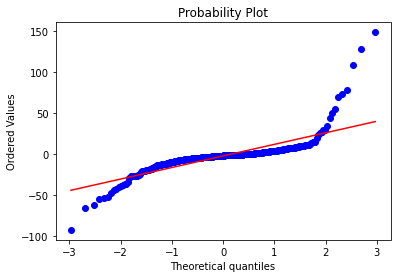

In [30]:
import scipy
scipy.stats.probplot(residual, dist="norm", plot=plt)
plt.show()

In [31]:
s = residual.std()
opt_dec_N=round(sct.norm.ppf(Under/(Under+Over))*s + result['Predicted_sales'])

#### Exponential Distribution

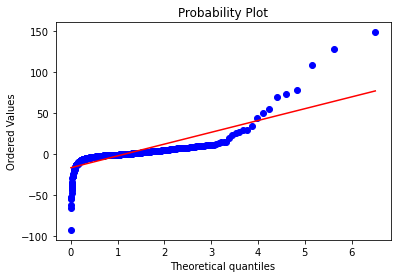

In [32]:
scipy.stats.probplot(residual, dist="expon", plot=plt)
plt.show()

In [33]:
opt_dec_E=round((-result['Predicted_sales'])*np.log(1-(Under/(Under+Over))))

#### Empirical Distribution

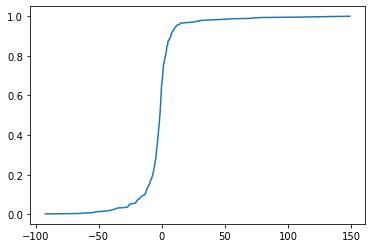

In [34]:
size = residual.shape[0]
step=1/size
jumps = [step*i for i in range(1,size+1)]
Sample = sorted(residual)
plt.plot(Sample,jumps)

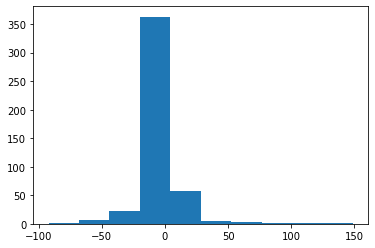

In [35]:
plt.hist(Sample)
plt.show()

In [36]:
def inv(sample,jump,area):
    size = len(sample)
    i=0
    temp=jump[i]
    while temp<area:
        i+=1
        temp=jump[i]
        
    return sample[i]

In [37]:
offset = inv(Sample,jumps,2/3)
offset

0.11203385494365037

In [38]:
opt_dec_B = round(result['Predicted_sales']+offset)

# 7. Out-of-samples Profit

In [39]:
#max profit for test data set
max_profit = result['sales'].sum()*(Price-Cost)
max_profit

82096

In [40]:
def profit(demand,inv):
    return (Price-Salvage)*np.minimum(demand,inv)-(Cost-Salvage)*inv

In [41]:
#Profit (None)
profit_lst = profit(round(result['sales']),round(result['Predicted_sales']))
profit_lst.sum()

60024.0

In [42]:
#Profit (Normal)
profit_lst_N = profit(result['sales'],opt_dec_N)
profit_lst_N.sum()

53644.0

In [43]:
#Profit (Exponential)
profit_lst_E = profit(result['sales'],opt_dec_E)
profit_lst_E.sum()

59856.0

In [44]:
#Profit (Empirical)
profit_lst_B = profit(result['sales'],opt_dec_B)
profit_lst_B.sum()

59972.0

# 8. K-Fold Cross Validation

### Repeat steps 5,6,7 with 10-fold cross validation

In [45]:
Model_4= RandomForestRegressor(ccp_alpha=best_ccp_alpha,n_estimators=best_n_est)

In [46]:
from sklearn.model_selection import KFold
k=10
kf = KFold(n_splits=k)
X_train_t=X_train.to_numpy()
Y_train_t=Y_train.to_numpy()
model = []
mse_lst = []
max_profit_lst = []
profit_N_lst = []
profit_E_lst = []
profit_B_lst = []

for train_index,test_index in kf.split(X_train_t):
    X_train_K,X_test_K=X_train_t[train_index],X_train_t[test_index]
    Y_train_K,Y_test_K=Y_train_t[train_index],Y_train_t[test_index]
    
    
    #Model
    RG_K = Model_4
    RG_K.fit(X_train_K,Y_train_K.ravel())
    
    
    #MSE
    mse_lst.append(MSE(RG_K.predict(X_test_K),Y_test_K))
    
    result_K = pd.DataFrame(Y_test_K)
    result_K["Predicted_sales"] = RG_K.predict(X_test_K)
    
    #Obtain residual
    residual_K = result_K[0]-result_K['Predicted_sales']
    
    #Get std for Normal distribution
    s_K = residual_K.std()
    
    #Inventory Decision (Normal)
    opt_dec_N_K=np.ceil(sct.norm.ppf(Under/(Under+Over))*s_K + result_K['Predicted_sales'])
    #Inventory Decision (Exponential)
    opt_dec_E_K=np.ceil((-result_K['Predicted_sales'])*np.log(1-(Under/(Under+Over))))
    
    #Inventory Decision (Empirical Distribution)
    size_K = residual_K.shape[0]
    step_K=1/size_K
    jumps_K = [step_K*i for i in range(1,size_K+1)]
    Sample_K = sorted(residual_K)
    offset_K = inv(Sample_K,jumps_K,2/3)
    opt_dec_B_K = np.ceil(result_K['Predicted_sales']+offset_K)
    
    #Out-of_sample profit
    profit_lst_B_K = profit(result_K[0],opt_dec_B_K)
    profit_B_lst.append(profit_lst_B_K.sum())
    
    profit_lst_N_K = profit(result_K[0],opt_dec_N_K)
    profit_N_lst.append(profit_lst_N_K.sum())
    
    profit_lst_E_K = profit(result_K[0],opt_dec_E_K)
    profit_E_lst.append(profit_lst_E_K.sum())
    
    max_profit_K = result_K[0].sum()*(Price-Cost)
    max_profit_lst.append(max_profit_K)
    
max_profit_lst = np.array(max_profit_lst)
profit_N_lst = np.array(profit_N_lst)
profit_E_lst = np.array(profit_E_lst)
profit_B_lst = np.array(profit_B_lst)

fraction_of_max_N = profit_N_lst/max_profit_lst
fraction_of_max_E = profit_E_lst/max_profit_lst
fraction_of_max_B = profit_B_lst/max_profit_lst

dist_profit = ["Normal","Exponential","Empirical","Max"]
dist_frac = ["Normal","Exponential","Empirical"]
col_name = ["Dataset_"+str(i) for i in range(1,k+1)]

profit_lst = [profit_N_lst,profit_E_lst,profit_B_lst,max_profit_lst]
profit_table = pd.DataFrame(profit_lst,index=dist_profit,columns=col_name)
profit_table["mean_profit"]=profit_table.mean(axis=1)
profit_table["std_profit"]=profit_table.std(ddof=1,axis=1)

fraction_lst = [fraction_of_max_N,fraction_of_max_E,fraction_of_max_B]
fraction_table = pd.DataFrame(fraction_lst,index=dist_frac,columns=col_name)
fraction_table["mean_fraction"]=fraction_table.mean(axis=1)

In [47]:
fraction_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_fraction
Normal,0.729944,0.708768,0.586833,0.622489,0.554956,0.719730,0.692616,0.660798,0.597351,0.663369,0.653685
Exponential,0.777112,0.754729,0.721185,0.744635,0.725705,0.770027,0.760660,0.725585,0.706693,0.739819,0.742615
Empirical,0.785038,0.750840,0.721531,0.737425,0.710073,0.772690,0.746692,0.725152,0.712330,0.736746,0.739852


In [48]:
profit_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_profit,std_profit
Normal,30208.0,32076.0,27168.0,29008.0,27548.0,28104.0,33916.0,30476.0,26704.0,27628.0,29283.6,2233.467940
Exponential,32160.0,34156.0,33388.0,34700.0,36024.0,30068.0,37248.0,33464.0,31592.0,30812.0,33361.2,2157.536410
Empirical,32488.0,33980.0,33404.0,34364.0,35248.0,30172.0,36564.0,33444.0,31844.0,30684.0,33219.2,1881.921401
Max,41384.0,45256.0,46296.0,46600.0,49640.0,39048.0,48968.0,46120.0,44704.0,41648.0,44966.4,3203.875254


In [49]:
mse_table = pd.DataFrame(mse_lst,index=col_name,columns=['Cross Validation MSE'])
mse_table

,Cross Validation MSE
Dataset_1,153.008980
Dataset_2,260.436204
Dataset_3,791.928451
Dataset_4,678.379313
Dataset_5,1206.318468
Dataset_6,154.742907
Dataset_7,380.363905
Dataset_8,406.711814
Dataset_9,592.133126
Dataset_10,272.603410


In [50]:
print(f"Average 10 fold CV MSE:  {float(mse_table.mean())}")

Average 10 fold CV MSE:  489.66265771723886


In [51]:
profit_table.to_csv(".\\Model_Selection_Result\\4.2B_Random_forest(No_PCA).csv")

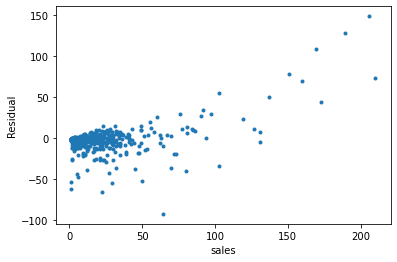

In [52]:
plt.xlabel("sales")
plt.ylabel("Residual")
plt.plot(result['sales'],residual,".")

In [53]:
name = "4.2B_Random_forest(No_PCA).csv"
mse_table.to_csv(f".\\Model_CV_Result_MSE\\{name}")

In [54]:
f = pd.DataFrame(fraction_table['mean_fraction'])
f = f.transpose().reset_index()
f.to_csv(f".\\Model_CV_Result_Efficiency\\{name}")